# Importing Labraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
column = [
        'duration                   '  ,'protocol_type              '  ,'service                    '  ,'flag                       '  ,'src_bytes                  '  ,'dst_bytes                  '  ,'land                       '  ,'wrong_fragment             '  ,'urgent                     '  ,'hot                        '  ,'num_failed_logins          '  ,'logged_in                  '  ,'num_compromised            '  ,'root_shell                 '  ,'su_attempted               '  ,'num_root                   '  ,'num_file_creations         '  ,'num_shells                 '  ,'num_access_files           '  ,'num_outbound_cmds          '  ,'is_host_login              '  ,'is_guest_login             '  ,'count                      '  ,'srv_count                  '  ,'serror_rate                '  ,'srv_serror_rate            '  ,'rerror_rate                '  ,'srv_rerror_rate            '  ,'same_srv_rate              '  ,'diff_srv_rate              '  ,'srv_diff_host_rate         '  ,'dst_host_count             '  ,'dst_host_srv_count         '  ,'dst_host_same_srv_rate     '  ,'dst_host_diff_srv_rate     '  ,'dst_host_same_src_port_rate'  ,'dst_host_srv_diff_host_rate'  ,'dst_host_serror_rate       '  ,'dst_host_srv_serror_rate   '  ,'dst_host_rerror_rate       '  ,'dst_host_srv_rerror_rate   ','target'  
]
  

# Load the data

In [4]:
data_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NSL_KDD_Train.csv',names=np.array(column),sep=',',encoding='utf-8')
# data_test =  pd.read_csv('.../content/drive/NSL_KDD_Test.csv',names=column,sep=',',encoding='utf-8')

In [5]:
data_train.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
42541,0,udp,domain_u,SF,46,134,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal
65862,0,tcp,ftp_data,SF,748,0,0,0,0,0,...,1,0.08,0.33,0.08,0.00,0.0,0.0,0.00,0.0,normal
12063,0,icmp,eco_i,SF,8,0,0,0,0,0,...,173,1.00,0.00,1.00,0.25,0.0,0.0,0.00,0.0,nmap
40621,0,tcp,telnet,S0,0,0,0,0,0,0,...,65,0.25,0.02,0.01,0.00,1.0,1.0,0.00,0.0,neptune
8712,0,tcp,private,S0,0,0,0,0,0,0,...,20,0.36,0.12,0.02,0.00,1.0,1.0,0.00,0.0,neptune
81874,3,tcp,finger,SF,9,224,0,0,0,0,...,5,0.02,0.02,0.00,0.00,0.0,0.0,0.02,0.0,normal
63799,0,tcp,other,OTH,0,0,0,0,0,0,...,1,0.00,1.00,1.00,0.00,0.0,0.0,0.99,0.0,portsweep
106685,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.0,smurf
51657,0,tcp,http,SF,201,535,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal
95115,0,tcp,imap4,S0,0,0,0,0,0,0,...,3,0.01,0.06,0.00,0.00,1.0,1.0,0.00,0.0,neptune


In [6]:
# data_test.sample(10)

In [7]:
# data_train.to_csv('new SVM train data.csv')

# EDA

## train data

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
data_train.shape

(125973, 42)

### check for missing values

In [10]:
data_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

> clear!

### check for any duplications

In [11]:
data_train.duplicated().sum()

0

> no duplicated rows

### check unique values on each column

In [12]:
data_train.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [13]:
data_train.columns

Index(['duration                   ', 'protocol_type              ',
       'service                    ', 'flag                       ',
       'src_bytes                  ', 'dst_bytes                  ',
       'land                       ', 'wrong_fragment             ',
       'urgent                     ', 'hot                        ',
       'num_failed_logins          ', 'logged_in                  ',
       'num_compromised            ', 'root_shell                 ',
       'su_attempted               ', 'num_root                   ',
       'num_file_creations         ', 'num_shells                 ',
       'num_access_files           ', 'num_outbound_cmds          ',
       'is_host_login              ', 'is_guest_login             ',
       'count                      ', 'srv_count                  ',
       'serror_rate                ', 'srv_serror_rate            ',
       'rerror_rate                ', 'srv_rerror_rate            ',
       'same_srv_rate             

In [14]:
data_train.columns = data_train.columns.str.strip()

In [15]:
cat_data = data_train.select_dtypes('object')

In [16]:
cat_data.describe().T

,count,unique,top,freq
protocol_type,125973,3,tcp,102689
service,125973,70,http,40338
flag,125973,11,SF,74945
target,125973,23,normal,67343


In [17]:
cat_data['target'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: target, dtype: int64

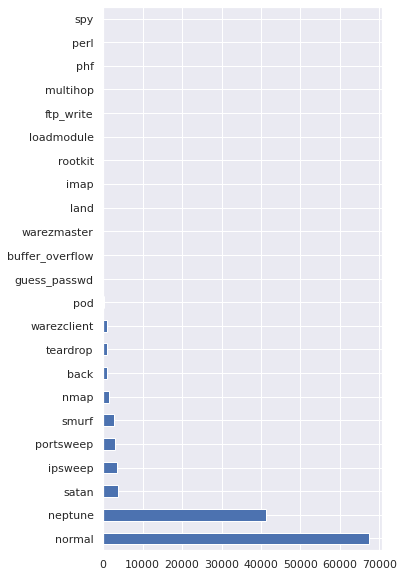

In [18]:
sns.set()
plt.figure(figsize=(5,10))
cat_data['target'].value_counts().plot(kind='barh')

> we have to decide whether its considered an atack or not (actack or normal ) ,so we can combine all atacks to be have one label  

In [19]:
def filter_target(value):
  if value != 'normal':
    return 'atack'
  else:
    return value  

In [20]:
data_train['target'] = data_train['target'].apply(filter_target)

In [21]:
# for idx in range(len(data_train['target'])):
#   # item = data_train['target'][idx]     
#   # if item != 'normal':
#   #   data_train['target'][idx] = 'atack'

In [22]:
data_train['target'].value_counts()

normal    67343
atack     58630
Name: target, dtype: int64

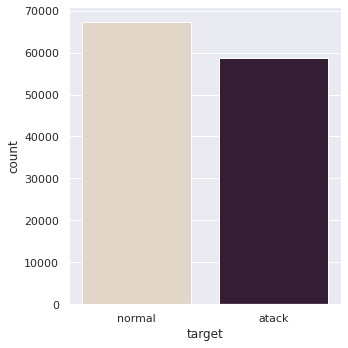

In [23]:
sns.catplot(data=data_train, x='target', kind="count", palette="ch:.25")

> so our target now is not imbalanced and our models could train well!

# categorical varaiables VS target col 

In [24]:
from scipy.stats import chi2_contingency

In [25]:
cat_data

,protocol_type,service,flag,target
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [26]:
def get_observation_table(X,cols):
  # cols = ['tcp','udp','icmp','row_total']
  table = pd.crosstab(data_train['target'],X,margins=True)
  table.columns = cols
  table.index = ['normal','atack','col_totals']
  return table

## protocol_type VS target

In [27]:
# chi-squared test for independence
# df = cat_data[['protocol_type','target']]
cols = ['tcp','udp','icmp','row_total']
table = pd.crosstab(data_train['target'],data_train['protocol_type'],margins=True)
table.columns = cols
table.index = ['normal','atack','col_totals']

In [28]:
table

,tcp,udp,icmp,row_total
normal,6982,49089,2559,58630
atack,1309,53600,12434,67343
col_totals,8291,102689,14993,125973


In [29]:
chi2_contingency(observed=table.iloc[0:2,:3],)

(10029.24862778463,
 0.0,
 2,
 array([[ 3858.77394362, 47793.22608813,  6977.99996825],
        [ 4432.22605638, 54895.77391187,  8015.00003175]]))

> since the p-value is equal to 0 , so we must reject our NULL hypothesis and accept that the dependency between the target and protocol_type

## service VS target


In [30]:
data_train['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [31]:
cols = data_train['service'].unique()
list_cols = list(cols)
list_cols.append('total_rows')
print(list_cols)

['ftp_data', 'other', 'private', 'http', 'remote_job', 'name', 'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u', 'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp', 'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap', 'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois', 'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login', 'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u', 'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell', 'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i', 'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i', 'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest', 'total_rows']


In [32]:
table_service = get_observation_table(data_train['service'],list_cols)

In [33]:
chiq,p_value,dof,_= chi2_contingency(observed=table.iloc[:-1,:-1])
p_value

0.0

## Flag VS target

In [34]:
data_train['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [35]:
cols = list(data_train['flag'].unique())
cols.append('total_rows')
table_flag = get_observation_table(data_train['flag'],cols)  
chiq,p_value,_,_= chi2_contingency(observed=table_flag.iloc[:-1,:-1])
print(p_value)

0.0


# comment:
 <p> we have show that all categorical variables have relation between the target col by using p-value from chi-square test which is equal 0 for all tests</p>


# Encoding data

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
inputs = data_train.drop(['target'],axis=1)
target = data_train['target']
print(inputs.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [38]:
inputs.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [39]:
inputs.drop('num_outbound_cmds',axis=1,inplace=True)

In [40]:
# label_target = LabelEncoder()
target = target.map({'normal':0,'atack':1})


In [41]:
label_flag = LabelEncoder()
inputs['flag'] = label_flag.fit_transform(inputs['flag'])
label_serives = LabelEncoder()
inputs['service'] = label_serives.fit_transform(inputs['flag'])

In [42]:
# inputs.drop('protocol_type',axis=1,inplace=True)
# cat_data = inputs.select_dtypes('object')
# cat_data


In [43]:
dummi_protocol = pd.get_dummies(inputs['protocol_type'],drop_first=True)
inputs = pd.concat([inputs,dummi_protocol],axis=1)
inputs.drop('protocol_type',axis=1,inplace=True)

In [44]:
inputs.columns

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'tcp', 'udp'],
      dtype='object')

In [45]:
inputs['service'].dtype

dtype('int64')

In [159]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
correlated_with_target = []
for col in inputs.columns:
  if inputs[col].dtype != 'O':
    corr, _ = pearsonr(inputs[str(col)].values, target)
    print(f'{col}  ------>        {corr:.2f}')
    if corr > 0.1:
      # print(f'{col} corr with target ------>{corr:.2f}')
      correlated_with_target.append(col)
# corr1, _ = pearsonr(inputs['tcp'], target)
# corr2 ,_ = pearsonr(inputs['udp'], target)
# print(corr1,corr2)

duration  ------>        0.05
service  ------>        -0.65
flag  ------>        -0.65
src_bytes  ------>        0.01
dst_bytes  ------>        0.00
land  ------>        0.01
wrong_fragment  ------>        0.10
urgent  ------>        -0.00
hot  ------>        -0.01
num_failed_logins  ------>        -0.00
logged_in  ------>        -0.69
num_compromised  ------>        -0.01
root_shell  ------>        -0.02
su_attempted  ------>        -0.02
num_root  ------>        -0.01
num_file_creations  ------>        -0.02
num_shells  ------>        -0.01
num_access_files  ------>        -0.04
is_host_login  ------>        -0.00
is_guest_login  ------>        -0.04
count  ------>        0.58
srv_count  ------>        0.00
serror_rate  ------>        0.65
srv_serror_rate  ------>        0.65
rerror_rate  ------>        0.25
srv_rerror_rate  ------>        0.25
same_srv_rate  ------>        -0.75
diff_srv_rate  ------>        0.20
srv_diff_host_rate  ------>        -0.12
dst_host_count  ------>      

In [160]:
correlated_with_target

['count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [161]:
features = inputs[correlated_with_target]
features.max()

count                       511.0
serror_rate                   1.0
srv_serror_rate               1.0
rerror_rate                   1.0
srv_rerror_rate               1.0
diff_srv_rate                 1.0
dst_host_count              255.0
dst_host_diff_srv_rate        1.0
dst_host_serror_rate          1.0
dst_host_srv_serror_rate      1.0
dst_host_rerror_rate          1.0
dst_host_srv_rerror_rate      1.0
dtype: float64

In [162]:
features.min()

count                       0.0
serror_rate                 0.0
srv_serror_rate             0.0
rerror_rate                 0.0
srv_rerror_rate             0.0
diff_srv_rate               0.0
dst_host_count              0.0
dst_host_diff_srv_rate      0.0
dst_host_serror_rate        0.0
dst_host_srv_serror_rate    0.0
dst_host_rerror_rate        0.0
dst_host_srv_rerror_rate    0.0
dtype: float64

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features[['count','dst_host_count']] = scaler.fit_transform(features[['count','dst_host_count']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [140]:
features.max()

count                       1.0
serror_rate                 1.0
srv_serror_rate             1.0
dst_host_serror_rate        1.0
dst_host_srv_serror_rate    1.0
dtype: float64

# split data

In [47]:
from sklearn.model_selection import train_test_split

In [164]:
# features = inputs[correlated_with_target]
x_train,x_test,y_train,y_test = train_test_split(features,target,random_state=365,test_size=0.2,stratify=target)

In [165]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')


x_train: (100778, 12)
y_train: (100778,)
x_test : (25195, 12)
y_test : (25195,)


# Modelling

In [99]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## KNN


In [166]:
parameters = {'n_neighbors':[25,50,75],'weights':['uniform','distance']}
grid_search  = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters,
                           scoring='accuracy',n_jobs=-1)

In [167]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [25, 50, 75],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [168]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=25, weights='distance')

In [90]:
grid_search.best_score_

0.865635349655963

In [169]:
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')

In [170]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25, weights='distance')

In [171]:
knn.score(x_train,y_train)

0.9754708368890036

In [172]:
knn.score(x_test,y_test)

0.9644373883707085

In [173]:
y_pred = knn.predict(x_test)


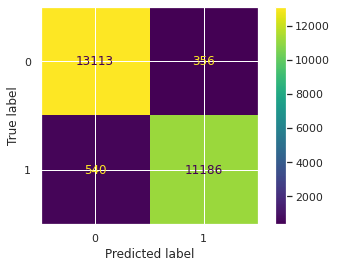

In [174]:
sns.set()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,labels=knn.classes_)

In [175]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     13469
           1       0.97      0.95      0.96     11726

    accuracy                           0.96     25195
   macro avg       0.96      0.96      0.96     25195
weighted avg       0.96      0.96      0.96     25195



## Random Forest

In [179]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [192]:
# help(RandomForestClassifier())

In [180]:
# SVC().get_params()

In [183]:
parameters = {'n_estimators': range(1,151),
              'max_depth':range(1,12),
              'max_features' : ["auto", "sqrt", "log2"]
              ,'bootstrap':[True,False]
              }
randm_src = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=365), param_distributions = parameters,
                               cv = 2, n_iter = 100, n_jobs=-1)

In [184]:
randm_src.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=365),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(1, 12),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': range(1, 151)})

In [185]:
randm_src.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=11, max_features='sqrt',
                       n_estimators=142, random_state=365)

In [186]:
randFor = RandomForestClassifier(bootstrap=False, max_depth=11, max_features='sqrt',
                       n_estimators=142, random_state=365)

In [187]:
randm_src.score(x_train,y_train)

0.9633848657445078

In [188]:
randm_src.score(x_test,y_test)

0.9623337963881723

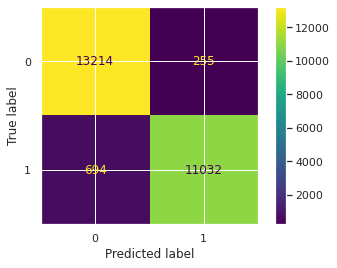

In [191]:
sns.set()
y_pred = randm_src.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred,y_true=y_test,labels=randm_src.classes_)

In [190]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     13469
           1       0.98      0.94      0.96     11726

    accuracy                           0.96     25195
   macro avg       0.96      0.96      0.96     25195
weighted avg       0.96      0.96      0.96     25195



## SVM

In [194]:
svm_model = SVC(kernel='rbf',C=1,random_state=365)

In [195]:
svm_model.fit(x_train,y_train)

SVC(C=1)

In [196]:
svm_model.score(x_train,y_train)

0.9284069935898708

In [197]:
svm_model.score(x_test,y_test)

0.9278031355427664

In [199]:
y_pred = svm_model.predict(x_test)

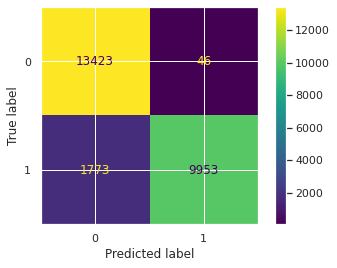

In [200]:
sns.set()
# y_pred = randm_src.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred,y_true=y_test,labels=svm_model.classes_)

In [201]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13469
           1       1.00      0.85      0.92     11726

    accuracy                           0.93     25195
   macro avg       0.94      0.92      0.93     25195
weighted avg       0.94      0.93      0.93     25195



### Tunning the C-parameter using GridSearch or RandomizedSearch

In [202]:
parameters = {'C':[10,50,70,100]}
randm_src = RandomizedSearchCV(estimator=SVC(random_state=365), param_distributions = parameters,
                               cv = 2, n_iter = 100, n_jobs=-1)

In [203]:
randm_src.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=2, estimator=SVC(random_state=365), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [10, 50, 70, 100]})

In [204]:
randm_src.score(x_train,y_train)

0.9483716684196948

In [205]:
randm_src.score(x_test,y_test)

0.9480055566580671

In [206]:
y_pred = randm_src.predict(x_test)

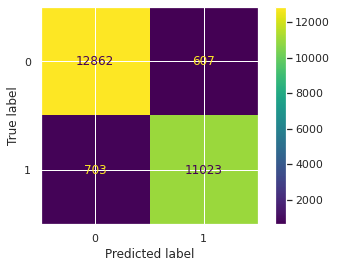

In [209]:
sns.set()
# y_pred = randm_src.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred,y_true=y_test,labels=randm_src.classes_)

In [208]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13469
           1       0.95      0.94      0.94     11726

    accuracy                           0.95     25195
   macro avg       0.95      0.95      0.95     25195
weighted avg       0.95      0.95      0.95     25195



In [210]:
randm_src.best_estimator_

SVC(C=100, random_state=365)